In [1]:
using Test

In [3]:
using Distributions

In [4]:
using CSV, DataFrames

┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1317


In [5]:
using HDF5

In [7]:
using Statistics
using StatsBase

In [87]:
using Plots

In [258]:
include("../src/ATools.jl")

Main.ATools

# Tests
1. test digitise
2. test various histograms and profiles. 

## Utils

In [17]:
df = DataFrame("event_id" => [1,2,3,4,5], 
               "index" => [10,20,30,40,50], 
               "data" => [100.,200.,300.,400.,500.])

,event_id,index,data
,Int64,Int64,Float64
1,1,10,100.0
2,2,20,200.0
3,3,30,300.0
4,4,40,400.0
5,5,50,500.0


In [13]:
@test ATools.select_by_index(df,
    "index", 1) == ATools.select_by_column_value(df, "index", 1)

Test Passed

In [18]:
ATools.select_event(df, 3)

,index,data
,Int64,Float64
1,30,300.0


In [21]:
df3 = ATools.select_event(df, 3)
@test df3.index[1] == 30
@test df3.data[1] == 300.0

Test Passed

In [34]:
@test ATools.select_by_column_value_interval(df, "data", 200.0, 400.0).index[1] ==30

Test Passed

In [37]:
@test ATools.find_max_xy(df, "event_id", "data") == (500.0, 5)

Test Passed

In [27]:
@test ATools.select_by_column_value_lt(df, "data", 200.0).index[1]==10

Test Passed

In [40]:
@test ATools.select_by_column_value_gt(df, "data", 400.0).index[1] == 50

Test Passed

## wstd

In [41]:
function wstd(x::Vector{T}, q::Vector{T}) where T <: Number
	xmean = mean(x)
	qs = sum((x.-xmean).^2 .* q)
	Q = sum(q)
	return sqrt(qs/Q)
end

wstd (generic function with 1 method)

In [42]:
dx = Normal(100.0, 5.0)

Normal{Float64}(μ=100.0, σ=5.0)

In [205]:
 data = rand(dx, 50000);

In [206]:
std(data)

5.002206796466397

In [207]:
qs = ones(length(data));

In [208]:
wstd(data, qs)

5.002156774148319

#### thus wstd is the std when qs are 1

In [209]:
qx = Normal(100.0, 10.0)  # charges with mean value of 10 and std of 10.0

Normal{Float64}(μ=100.0, σ=10.0)

In [216]:
qs = rand(qx, 50000);

In [217]:
wstd(data, qs)

5.002442035561108

## Histos

In [218]:
bins = [0,1,7] # a small and a large bin
obs = [0.5, 1.5, 1.5, 2.5]; # one observation in the small bin and three in the large
h= ATools.hist1d(obs, bins, false) # not normalized

Histogram{Int64, 1, Tuple{Vector{Int64}}}
edges:
  [0, 1, 7]
weights: [1, 3]
closed: left
isdensity: false

In [219]:
hn= ATools.hist1d(obs, bins, true) # normalized

Histogram{Float64, 1, Tuple{Vector{Int64}}}
edges:
  [0, 1, 7]
weights: [1.0, 0.5]
closed: left
isdensity: true

In [220]:
# hn.w = h.w/bin
he = ATools.edges(h)
xn = [h.weights[i] / (he[i+1]- he[i]) for i in 1:length(h.weights)]

2-element Vector{Float64}:
 1.0
 0.5

In [221]:
@test all(xn .== hn.weights)

Test Passed

In [222]:
h= ATools.hist1d(qs, 100, 50.0, 150.0)

Histogram{Int64, 1, Tuple{Vector{Float64}}}
edges:
  [50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0  …  141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0]
weights: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  1, 0, 0, 0, 0, 1, 0, 0, 0, 0]
closed: left
isdensity: false

In [223]:
println(h.edges[1])

[50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0]


In [224]:
@test all(ATools.edges(h) .== h.edges[1])

Test Passed

In [ ]:
println(ATools.centers(h))

[50.5, 51.5, 52.5, 53.5, 54.5, 55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5, 66.5, 67.5, 68.5, 69.5, 70.5, 71.5, 72.5, 73.5, 74.5, 75.5, 76.5, 77.5, 78.5, 79.5, 80.5, 81.5, 82.5, 83.5, 84.5, 85.5, 86.5, 87.5, 88.5, 89.5, 90.5, 91.5, 92.5, 93.5, 94.5, 95.5, 96.5, 97.5, 98.5, 99.5, 100.5, 101.5, 102.5, 103.5, 104.5, 105.5, 106.5, 107.5, 108.5, 109.5, 110.5, 111.5, 112.5, 113.5, 114.5, 115.5, 116.5, 117.5, 118.5, 119.5, 120.5, 121.5, 122.5, 123.5, 124.5, 125.5, 126.5, 127.5, 128.5, 129.5, 130.5, 131.5, 132.5, 133.5, 134.5, 135.5, 136.5, 137.5, 138.5, 139.5, 140.5, 141.5, 142.5, 143.5, 144.5, 145.5, 146.5, 147.5, 148.5, 149.5]


In [225]:
he = ATools.edges(h)
hc = ATools.centers(h)
@test hc[1] == (he[1] + he[2]) / 2.0
@test hc[end] == (he[end-1] + he[end]) / 2.0

Test Passed

In [226]:
println(h.weights)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 5, 7, 6, 20, 19, 23, 38, 41, 67, 84, 98, 118, 166, 203, 218, 310, 353, 437, 537, 542, 688, 859, 929, 1000, 1140, 1303, 1407, 1507, 1610, 1766, 1772, 1882, 1989, 1984, 1974, 2045, 1993, 1911, 1940, 1736, 1717, 1560, 1467, 1378, 1273, 1131, 961, 981, 774, 693, 627, 475, 430, 343, 303, 244, 187, 188, 130, 94, 69, 59, 44, 38, 32, 17, 13, 10, 9, 4, 4, 3, 0, 5, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]


In [227]:
ic = argmax(h.weights)
@test hc[ic] > 99.0 && hc[ic] < 101.0

Test Passed

In [228]:
h2 = ATools.hist1d(qs, 25, 50.0, 150.0, true)
h2n = ATools.hist1d(qs, 25, 50.0, 150.0, false);

In [229]:
println(h2.weights)

[0.0, 0.0, 0.75, 2.0, 13.0, 42.25, 116.5, 271.0, 551.0, 982.0, 1456.75, 1852.25, 1999.0, 1826.0, 1419.5, 961.75, 556.25, 269.25, 120.25, 43.25, 12.25, 2.75, 2.0, 0.25, 0.0]


In [230]:
println(h2n.weights)

[0, 0, 3, 8, 52, 169, 466, 1084, 2204, 3928, 5827, 7409, 7996, 7304, 5678, 3847, 2225, 1077, 481, 173, 49, 11, 8, 1, 0]


In [ ]:
maximum(hn.weights)

2035.0

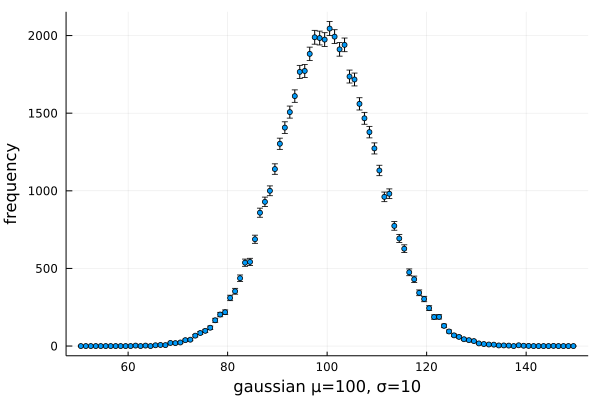

In [237]:
h,p = ATools.hist1d(qs, "gaussian μ=100, σ=10",  100, 50.0, 150.0)
plot(p)

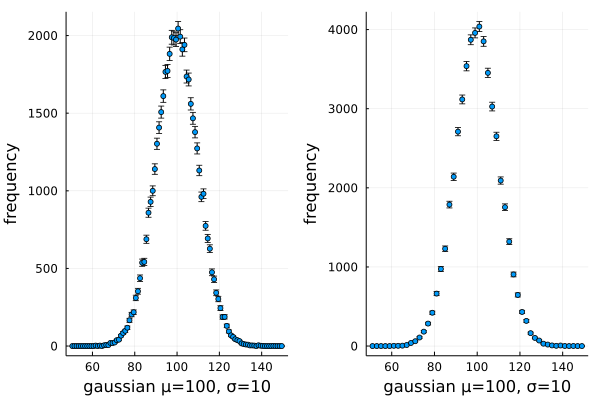

In [238]:
h2,p2 = ATools.hist1d(qs, "gaussian μ=100, σ=10",  50, 50.0, 150.0, norm=false)
h2n,p2n = ATools.hist1d(qs, "gaussian μ=100, σ=10",  50, 50.0, 150.0, norm=true)
plot(p, p2)

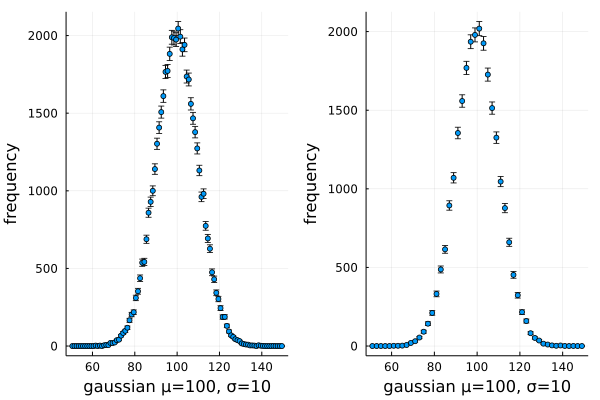

In [239]:
plot(p, p2n)

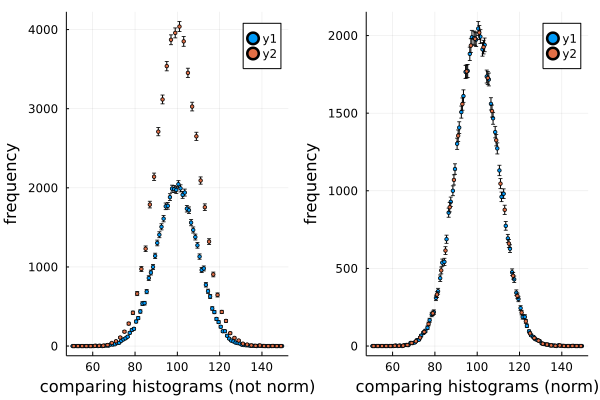

In [245]:
p1 = ATools.hist1d(h, h2, "comparing histograms (not norm)")
p2 = ATools.hist1d(h, h2n, "comparing histograms (norm)")
plot(p1,p2)


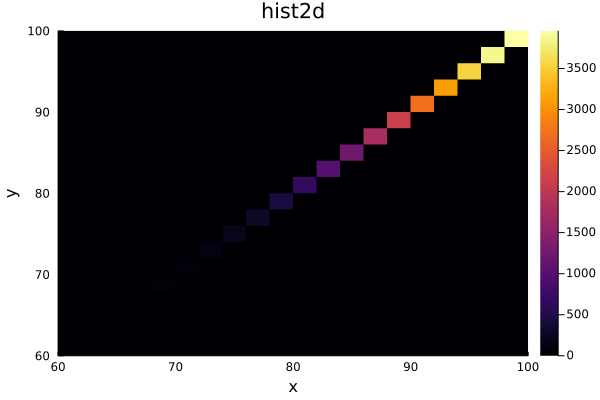

In [248]:
h2, p = ATools.hist2d(qs,qs, 25, "x", "y", 0., 100., 0., 100., title= "hist2d")
plot(p)

In [256]:
xs=rand(Float64, length(qs));

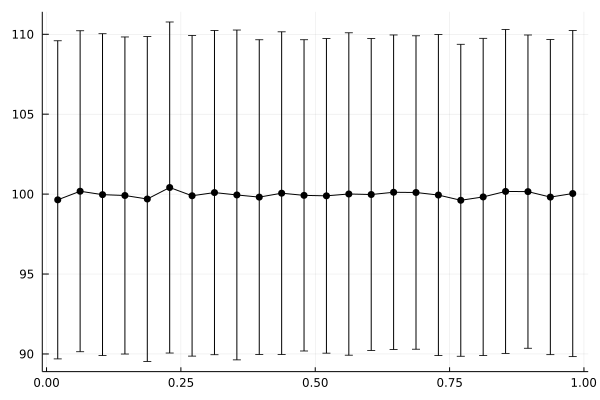

In [260]:
p1df, p = ATools.p1df(xs, qs, 25)
plot(p)

In [264]:
names(p1df)

4-element Vector{String}:
 "y_mean"
 "y_std"
 "x_mean"
 "x_std"

In [269]:
@test (mean(p1df.y_mean) > 99.9 && mean(p1df.y_mean) < 100.1)

Test Passed

In [270]:
@test (mean(p1df.x_mean) > 0.49 && mean(p1df.x_mean) < 0.51)

Test Passed

In [272]:
@test (mean(p1df.y_std) > 9.9 && mean(p1df.y_std) < 10.1)

Test Passed

In [268]:
mean(p1df.x_std)

0.020832870761065048